In [239]:
import pandas as pd
import numpy as np

# info on what each col name means: http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt

In [240]:
doc = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_181201.txt')

In [241]:
doc.head()

# C/A      = Control Area (A002)
# UNIT     = Remote Unit for a station (R051)
# SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)
# STATION  = Represents the station name the device is located at
# LINENAME = Represents all train lines that can be boarded at this station
#            Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
# DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   
# DATE     = Represents the date (MM-DD-YY)
# TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
# DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
#            1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
#            2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
# ENTRIES  = The comulative entry register value for a device
# EXIST    = The cumulative exit register value for a device


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,03:00:00,REGULAR,6845468,2321627
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,07:00:00,RECOVR AUD,6845479,2321635
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,11:00:00,RECOVR AUD,6845578,2321702
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,15:00:00,RECOVR AUD,6845780,2321753
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/24/2018,19:00:00,REGULAR,6846083,2321818


In [298]:
import string

In [311]:
cols = doc.columns
col_new = [str.strip(col) for col in cols]

doc.columns.rename(columns=col_new)
doc.columns

TypeError: 'list' object is not callable

In [242]:
sorted_date = doc.sort_values(by='DATE').tail()
sorted_date

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
47821,N049,R084,01-02-00,59 ST COLUMBUS,ABCD1,IND,11/30/2018,19:00:00,REGULAR,14905971,12241973
47820,N049,R084,01-02-00,59 ST COLUMBUS,ABCD1,IND,11/30/2018,15:00:00,REGULAR,14905175,12240829
47819,N049,R084,01-02-00,59 ST COLUMBUS,ABCD1,IND,11/30/2018,11:00:00,REGULAR,14904723,12239902
151215,R227,R131,00-00-02,23 ST,6,IRT,11/30/2018,04:00:00,REGULAR,13621089,6193814
199352,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/30/2018,20:00:00,REGULAR,5554,366


In [243]:
set(list(doc.STATION))

{'1 AV',
 '103 ST',
 '103 ST-CORONA',
 '104 ST',
 '110 ST',
 '111 ST',
 '116 ST',
 '116 ST-COLUMBIA',
 '121 ST',
 '125 ST',
 '135 ST',
 '137 ST CITY COL',
 '138/GRAND CONC',
 '14 ST',
 '14 ST-UNION SQ',
 '145 ST',
 '149/GRAND CONC',
 '14TH STREET',
 '15 ST-PROSPECT',
 '155 ST',
 '157 ST',
 '161/YANKEE STAD',
 '163 ST-AMSTERDM',
 '167 ST',
 '168 ST',
 '169 ST',
 '170 ST',
 '174 ST',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 ST',
 '181 ST',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '20 AV',
 '207 ST',
 '21 ST',
 '21 ST-QNSBRIDGE',
 '215 ST',
 '219 ST',
 '225 ST',
 '23 ST',
 '231 ST',
 '233 ST',
 '238 ST',
 '25 AV',
 '25 ST',
 '28 ST',
 '3 AV',
 '3 AV 138 ST',
 '3 AV-149 ST',
 '30 AV',
 '33 ST',
 '33 ST-RAWSON ST',
 '34 ST-HERALD SQ',
 '34 ST-HUDSON YD',
 '34 ST-PENN STA',
 '36 AV',
 '36 ST',
 '4 AV-9 ST',
 '40 ST LOWERY ST',
 '42 ST-BRYANT PK',
 '42 ST-PORT AUTH',
 '45 ST',
 '46 ST',
 '46 ST BLISS ST',
 '47-50 STS ROCK',
 '49 ST',
 '4AV-9 ST',
 '5 AV/53 ST',
 '5 AV/59 ST',
 '

# Get single turnstile for one day

- get turnstile info for exits and entries for each increment at each day

In [294]:
rector_st_turnstiles = doc.loc[doc['STATION'] == 'RECTOR ST'].loc[doc['DATE'] == '11/30/2018']
set(rector_st_turnstiles.SCP)

{'00-00-00',
 '00-00-01',
 '00-00-02',
 '00-00-03',
 '00-00-04',
 '00-06-00',
 '00-06-01',
 '01-00-00',
 '01-00-01',
 '01-00-02',
 '01-03-00',
 '01-03-01',
 '01-03-02',
 '01-06-00',
 '01-06-01'}

In [288]:
turnstile_1 = doc.loc[doc['STATION'] == 'RECTOR ST'].loc[doc['DATE'] == '11/30/2018'].loc[doc['SCP']=='00-06-01'].loc[doc['LINENAME'] == '1']
turnstile_1
# turnstile_1.sort_values(by='TIME')

first_entry_set = turnstile_1.sort_values(by='TIME')
last_entry_set = turnstile_1.sort_values(by='TIME')

first_entry_set
# total entered for one turnstile in one day at Rector Street
# last_entry_set - first_entry_set
# one_train.loc[one_train['TIME'] == '03:00:00'].sort_values(by='ENTRIES')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
124711,R103,R304,00-06-01,RECTOR ST,1,IRT,11/30/2018,03:00:00,REGULAR,13490,136031
124712,R103,R304,00-06-01,RECTOR ST,1,IRT,11/30/2018,07:00:00,REGULAR,13491,136047
124713,R103,R304,00-06-01,RECTOR ST,1,IRT,11/30/2018,11:00:00,REGULAR,13497,136251
124714,R103,R304,00-06-01,RECTOR ST,1,IRT,11/30/2018,15:00:00,REGULAR,13512,136532
124715,R103,R304,00-06-01,RECTOR ST,1,IRT,11/30/2018,19:00:00,REGULAR,13548,136782
124716,R103,R304,00-06-01,RECTOR ST,1,IRT,11/30/2018,23:00:00,REGULAR,13555,137008


# Collect info for all turnstiles for one stop at Rector street

Clean MTA related info: exits, entries, times,

Exogeneous factors: day, weather, season

location / business related stop?

Turn above into a function that you can run on all turnstiles for one location

# Repeat for different, second location

test smaller portion of method on second location

In [184]:
import matplotlib.pyplot as plt

In [187]:
entries = saturday_nov_24['ENTRIES']
time = saturday_nov_24['TIME']
len(time)

120

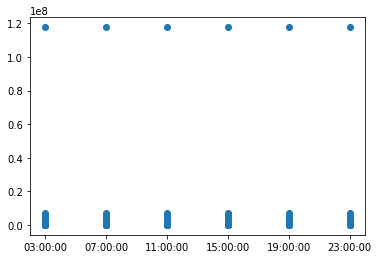

In [182]:
plt.scatter(saturday_nov_24.TIME, saturday_nov_24.ENTRIES)